In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [5]:
c = 299792458
h = 4.135668e-15
d = 2.82e-10

In [6]:
gauss_kbr = pd.read_csv('./Dados2/kbr_sem.csv',sep='\s', decimal=',')
gauss_kbr_x_sem = np.array(gauss_kbr['Ângulo'])
gauss_kbr_x_sem_e =  1e-3 * h*c/(2*d*np.sin(gauss_kbr_x_sem * np.pi/180))
gauss_kbr_y_sem = np.array(gauss_kbr['R'])

gauss_kbr = pd.read_csv('./Dados2/kbr_zr.csv',sep='\s', decimal=',')
gauss_kbr_x_zr = np.array(gauss_kbr['Ângulo'])
gauss_kbr_x_zr_e =  1e-3 * h*c/(2*d*np.sin(gauss_kbr_x_zr * np.pi/180))
gauss_kbr_y_zr = np.array(gauss_kbr['R'])

gauss_kbr = pd.read_csv('./Dados2/kbr_mo.csv',sep='\s', decimal=',')
gauss_kbr_x_mo = np.array(gauss_kbr['Ângulo'])
gauss_kbr_x_mo_e =  1e-3 * h*c/(2*d*np.sin(gauss_kbr_x_mo * np.pi/180))
gauss_kbr_y_mo = np.array(gauss_kbr['R'])

gauss_kbr = pd.read_csv('./Dados2/kbr_al.csv',sep='\s', decimal=',')
gauss_kbr_x_al = np.array(gauss_kbr['Ângulo'])
gauss_kbr_x_al_e =  1e-3 * h*c/(2*d*np.sin(gauss_kbr_x_al * np.pi/180))
gauss_kbr_y_al = np.array(gauss_kbr['R'])



C:\Users\victo\AppData\Local\Temp\ipykernel_21084\2978624705.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_kbr = pd.read_csv('./Dados2/kbr_sem.csv',sep='\s', decimal=',')
C:\Users\victo\AppData\Local\Temp\ipykernel_21084\2978624705.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_kbr = pd.read_csv('./Dados2/kbr_zr.csv',sep='\s', decimal=',')
C:\Users\victo\AppData\Local\Temp\ipykernel_21084\2978624705.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as rege

Plot

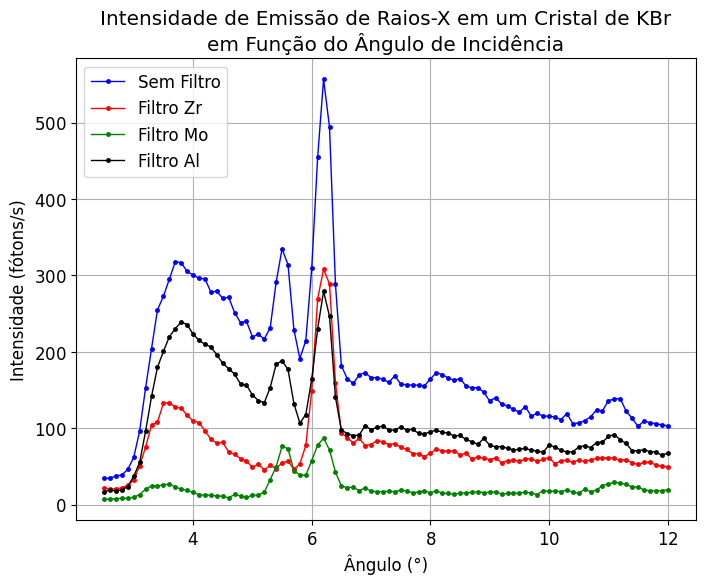

In [9]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos:
def gauss_plot(dados_x, dados_y, cor, legenda):
    grafico.plot(dados_x, dados_y, marker = '.', markersize=5, color = cor, linewidth = 1, label =legenda)

gauss_plot(gauss_kbr_x_sem, gauss_kbr_y_sem, 'blue', 'Sem Filtro')
gauss_plot(gauss_kbr_x_zr, gauss_kbr_y_zr, 'red', 'Filtro Zr')
gauss_plot(gauss_kbr_x_mo, gauss_kbr_y_mo, 'green', 'Filtro Mo')
gauss_plot(gauss_kbr_x_al, gauss_kbr_y_al, 'black', 'Filtro Al')
# plot do ajuste
# grafico.plot(x_model_n, y_model_n,  color = 'red')
# grafico.plot(x_model_p, y_model_p,  color = 'red')

# grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Ângulo (°)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de KBr\nem Função do Ângulo de Incidência') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


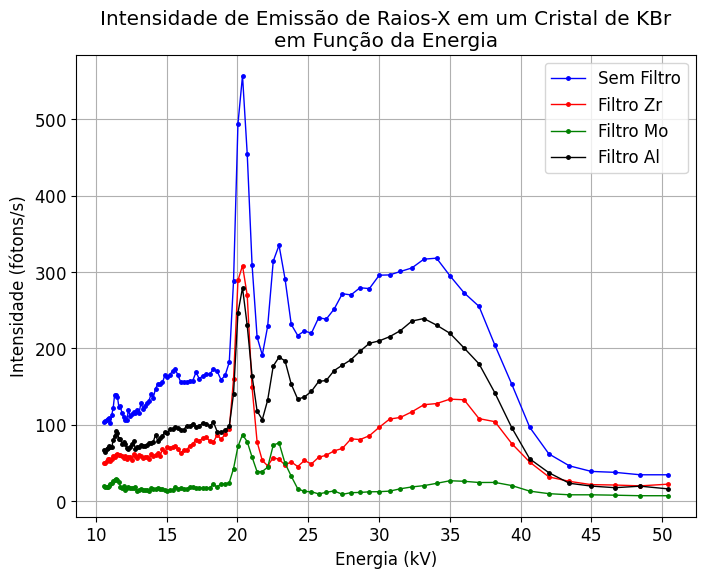

In [10]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos:
def gauss_plot(dados_x, dados_y, cor, legenda):
    grafico.plot(dados_x, dados_y, marker = '.', markersize=5, color = cor, linewidth = 1, label = legenda )

gauss_plot(gauss_kbr_x_sem_e, gauss_kbr_y_sem, 'blue', 'Sem Filtro')
gauss_plot(gauss_kbr_x_zr_e, gauss_kbr_y_zr, 'red', 'Filtro Zr')
gauss_plot(gauss_kbr_x_mo_e, gauss_kbr_y_mo, 'green', 'Filtro Mo')
gauss_plot(gauss_kbr_x_al_e, gauss_kbr_y_al, 'black', 'Filtro Al')
# plot do ajuste
# grafico.plot(x_model_n, y_model_n,  color = 'red')
# grafico.plot(x_model_p, y_model_p,  color = 'red')

# grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (kV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de KBr\nem Função da Energia') #título
grafico.legend(loc = 'upper right', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()
